# JWST 2-band AGN selection test
## Benjamin Floyd
Testing if we can select for AGN using only F150W2 and F322W2 NIRCam filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import Table
from synphot import Observation, SourceSpectrum, SpectralElement, units

In [2]:
# Filter file names
f150w2_fname = 'Data_Repository/filter_curves/JWST/nircam_throughputs/modA/nrc_plus_ote/F150W2_nircam_plus_ote_throughput_moda_sorted.txt'
f322w2_fname = 'Data_Repository/filter_curves/JWST/nircam_throughputs/modA/nrc_plus_ote/F322W2_nircam_plus_ote_throughput_moda_sorted.txt'

# Load the filters in
f150w2 = SpectralElement.from_file(f150w2_fname, wave_unit=u.um)
f322w2 = SpectralElement.from_file(f322w2_fname, wave_unit=u.um)

In [3]:
# SED file names
Ell5_fname = 'Data_Repository/SEDs/Polletta-SWIRE/Ell5_template_norm.sed'
M82_fname = 'Data_Repository/SEDs/Polletta-SWIRE/M82_template_norm.sed'
QSO2_fname = 'Data_Repository/SEDs/Polletta-SWIRE/QSO2_template_norm.sed'

# Load the rest-frame SEDs in
Ell5 = SourceSpectrum.from_file(Ell5_fname, wave_unit=u.Angstrom, flux_unit=units.FLAM)
M82 = SourceSpectrum.from_file(M82_fname, wave_unit=u.Angstrom, flux_unit=units.FLAM)
QSO2 = SourceSpectrum.from_file(QSO2_fname, wave_unit=u.Angstrom, flux_unit=units.FLAM)

In [4]:
z_range = np.arange(0.2, 1.7, 0.05)

# Redshift the spectra and make observations
elliptical_flux, starburst_flux, agn_flux = [], [], []
for z in z_range:
    Ell5_z = SourceSpectrum(Ell5.model, z=z)
    M82_z = SourceSpectrum(M82.model, z=z)
    QSO2_z = SourceSpectrum(QSO2.model, z=z)

    Ell5_z_f150w2 = Observation(Ell5_z, f150w2).integrate(flux_unit=units.FLAM).to_value(u.ABmag, equivalencies=u.spectral_density(f150w2.pivot()))
    M82_z_f150w2 = Observation(M82_z, f150w2).integrate(flux_unit=units.FLAM).to_value(u.ABmag, equivalencies=u.spectral_density(f150w2.pivot()))
    QSO2_z_f150w2 = Observation(QSO2_z, f150w2).integrate(flux_unit=units.FLAM).to_value(u.ABmag, equivalencies=u.spectral_density(f150w2.pivot()))

    Ell5_z_f322w2 = Observation(Ell5_z, f322w2).integrate(flux_unit=units.FLAM).to_value(u.ABmag, equivalencies=u.spectral_density(f322w2.pivot()))
    M82_z_f322w2 = Observation(M82_z, f322w2).integrate(flux_unit=units.FLAM).to_value(u.ABmag, equivalencies=u.spectral_density(f322w2.pivot()))
    QSO2_z_f322w2 = Observation(QSO2_z, f322w2).integrate(flux_unit=units.FLAM).to_value(u.ABmag, equivalencies=u.spectral_density(f322w2.pivot()))

    elliptical_flux.append([Ell5_z_f150w2, Ell5_z_f322w2])
    starburst_flux.append([M82_z_f150w2, M82_z_f322w2])
    agn_flux.append([QSO2_z_f150w2, QSO2_z_f322w2])

In [5]:
obs_table = Table([*np.array(elliptical_flux).T, *np.array(starburst_flux).T, *np.array(agn_flux).T], names=['E_F150W2', 'E_F322W2', 'SB_F150W2', 'SB_F322W2', 'AGN_F150W2', 'AGN_F322W2'])

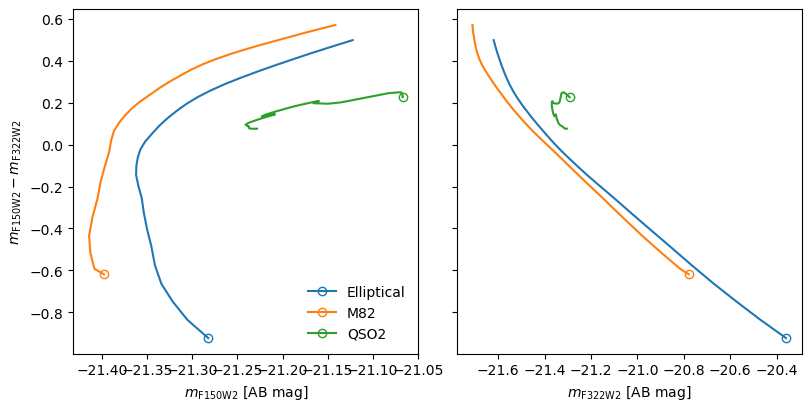

In [8]:
fig, (ax, bx) = plt.subplots(ncols=2, sharey='row', figsize=(8, 4), constrained_layout=True)
ax.plot(obs_table['E_F150W2'], obs_table['E_F150W2'] - obs_table['E_F322W2'], marker='o', markerfacecolor='none', markevery=[0], label='Elliptical')
ax.plot(obs_table['SB_F150W2'], obs_table['SB_F150W2'] - obs_table['SB_F322W2'], marker='o', markerfacecolor='none', markevery=[0], label='M82')
ax.plot(obs_table['AGN_F150W2'], obs_table['AGN_F150W2'] - obs_table['AGN_F322W2'], marker='o', markerfacecolor='none', markevery=[0], label='QSO2')

bx.plot(obs_table['E_F322W2'], obs_table['E_F150W2'] - obs_table['E_F322W2'], marker='o', markerfacecolor='none', markevery=[0], label='Elliptical')
bx.plot(obs_table['SB_F322W2'], obs_table['SB_F150W2'] - obs_table['SB_F322W2'], marker='o', markerfacecolor='none', markevery=[0], label='M82')
bx.plot(obs_table['AGN_F322W2'], obs_table['AGN_F150W2'] - obs_table['AGN_F322W2'], marker='o', markerfacecolor='none', markevery=[0], label='QSO2')

ax.legend(frameon=False)
ax.set(xlabel=r'$m_\mathrm{F150W2}$ [AB mag]', ylabel=r'$m_\mathrm{F150W2} - m_\mathrm{F322W2}$')
bx.set(xlabel=r'$m_\mathrm{F322W2}$ [AB mag]')
fig.savefig('Data_Repository/Project_Data/Observations/JWST_Mahler_Survey/color_mag_tracks.pdf')
plt.show()

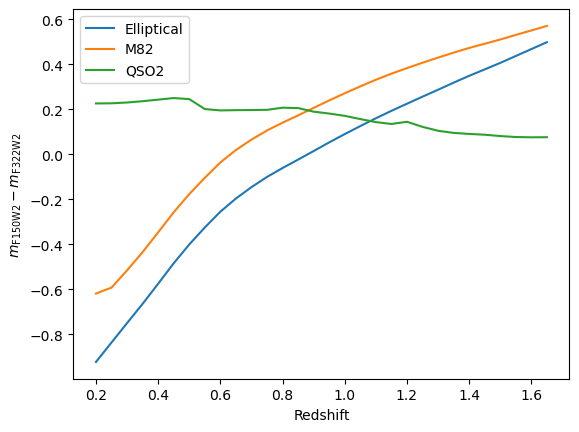

In [9]:
fig, ax = plt.subplots()
ax.plot(z_range, obs_table['E_F150W2'] - obs_table['E_F322W2'], label='Elliptical')
ax.plot(z_range, obs_table['SB_F150W2'] - obs_table['SB_F322W2'], label='M82')
ax.plot(z_range, obs_table['AGN_F150W2'] - obs_table['AGN_F322W2'], label='QSO2')
ax.legend()
ax.set(xlabel='Redshift', ylabel=r'$m_\mathrm{F150W2} - m_\mathrm{F322W2}$')
fig.savefig('Data_Repository/Project_Data/Observations/JWST_Mahler_Survey/color_redshift.pdf')
plt.show()